In [1]:
import os
import sys
import json
import datetime
import skimage.draw
import matplotlib.pyplot as plt
import glob

In [2]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_rock.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

C:\Users\sakshi11\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# IMAGE_PATH = os.path.join(ROOT_DIR, "images/image2.jpg")
# IMAGE_PATH2 = os.path.join(ROOT_DIR, "images/frame2950.jpg")
os.chdir('C:/Users/sakshi11/Downloads/Mask_RCNN-master/Mask_RCNN-master/rocks/')
filenames = glob.glob('*.jpg')
# image = plt.imread(IMAGE_PATH)
# # image_sub = plt.imread(IMAGE_PATH)
# # cropped = image[100:720, 400:820]
# plt.imshow(image)

In [4]:
# os.chdir('C:/Users/sakshi11/Downloads/Mask_RCNN-master/Mask_RCNN-master/images/')
# cv2.imwrite('image1.jpg', cropped)
# os.chdir('C:/Users/sakshi11/Downloads/Mask_RCNN-master/Mask_RCNN-master/samples/balloon/')

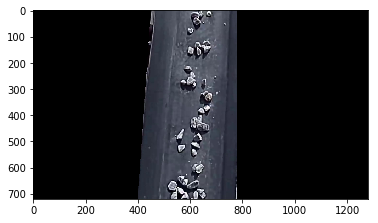

In [35]:
#Creating a quadrilateral mask image
imgshape=image.shape
# vertices=np.array([[(410, 95),(410, 720), (800, 720), (800, 95)]], dtype=np.int32)
vertices=np.array([[(450, 0),(400, 720), (780, 720), (780, 0)]], dtype=np.int32)
masked = region_of_interest(image, vertices)
plt.imshow(masked)


os.chdir('C:/Users/sakshi11/Downloads/Mask_RCNN-master/Mask_RCNN-master/images/')
cv2.imwrite('image2.jpg', masked)
os.chdir('C:/Users/sakshi11/Downloads/Mask_RCNN-master/Mask_RCNN-master/samples/balloon/')

In [5]:
############################################################
#  Configurations
############################################################


class RockConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "rock"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + balloon

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 60

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.65

In [6]:
def detect_area(image, mask, base):
    """Apply color splash effect.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]

    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray2 = skimage.color.gray2rgb(skimage.color.rgb2gray(base)) * 255
    gray1 = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
#     gray = np.zeros_like(gray1)
    diff = gray2 - gray1
    gray = cv2.bitwise_and(gray2, diff)
#     diff = cv2.bitwise_and(gray2, gray)
#     diff = gray2 - gray
    no_instance=mask.shape[2]
    mask_all = (np.sum(mask, -1, keepdims=True) >= 1)
    splash = np.where(mask_all, image, gray).astype(np.uint8)
    instances={}
    instances[0]=splash
    for i in range(no_instance):
        in_mask=mask[:,:,i]
        in_mask=np.reshape(in_mask,(mask.shape[0],mask.shape[1],1))
        # Copy color pixels from the original color image where mask is set
        instance = np.where(in_mask, image, gray).astype(np.uint8)
        instances[i+1]=instance
        #save file
        file_name = str(i)+"splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
        skimage.io.imsave(file_name, instance)
    else:
        splash = gray.astype(np.uint8)
    return instances

In [24]:
def detect_area(image, mask):
    """Apply color splash effect.
    image: RGB image [height, width, 3]
    mask: instance segmentation mask [height, width, instance count]

    Returns result image.
    """
    # Make a grayscale copy of the image. The grayscale copy still
    # has 3 RGB channels, though.
    gray = skimage.color.gray2rgb(skimage.color.rgb2gray(image)) * 255
    gray = np.zeros_like(gray)
    no_instance=mask.shape[2]
    mask_all = (np.sum(mask, -1, keepdims=True) >= 1)
    splash = np.where(mask_all, image, gray).astype(np.uint8)
    instances={}
    instances[0]=splash
    for i in range(no_instance):
        in_mask=mask[:,:,i]
        in_mask=np.reshape(in_mask,(mask.shape[0],mask.shape[1],1))
        # Copy color pixels from the original color image where mask is set
        instance = np.where(in_mask, image, gray).astype(np.uint8)
        instances[i+1]=instance
        #save file
        file_name = str(i)+"splash_{:%Y%m%dT%H%M%S}.png".format(datetime.datetime.now())
        skimage.io.imsave(file_name, instance)
    else:
        splash = gray.astype(np.uint8)
    return instances

In [7]:
def detect_and_extract(model, image_path=None, image_path2=None):
    # Run model detection and generate the color splash effect
    #print("Running on {}".format(args.image))
    # Read image
    image = skimage.io.imread(image_path)
    # Detect objects
    r = model.detect([image], verbose=1)[0]
    # Color splash
    base = skimage.io.imread(image_path2)
#     instances=detect_area(image, r['masks'])#, base)
    instances=detect_area(image, r['masks'], base)
        
    return instances

In [8]:
#for inference
class InferenceConfig(RockConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = InferenceConfig()
config.display()



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.65
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INST

In [9]:
model = modellib.MaskRCNN(mode="inference", config=config,model_dir="logs/")
weights_path = COCO_WEIGHTS_PATH
print("Loading weights ", weights_path)

Loading weights  C:\Users\sakshi11\Downloads\Mask_RCNN-master\Mask_RCNN-master\mask_rcnn_rock.h5


In [10]:
from mrcnn import model as modellib, utils
model.load_weights(weights_path, by_name=True)
import time

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 90.97 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 100.04 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            sh

molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 82.47 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 75.27 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)       

Processed in 71.98 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 69.83 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 71.20 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
m

molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 79.31 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 80.41 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)       

Processed in 77.96 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 78.21 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 77.95 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
m

molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 71.84 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 72.24 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)       

Processed in 66.61 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 65.47 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 68.02 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
m

molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 78.10 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 74.45 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)       

Processed in 71.20 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 70.36 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 67.54 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
m

molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 77.05 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 95.87 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)       

Processed in 87.64 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 90.98 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 87.52 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
m

molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 74.30 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 71.98 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)       

Processed in 78.72 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 79.33 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 77.34 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
m

molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 73.97 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 70.91 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)       

Processed in 90.08 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 95.20 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.17695  max:    1.11439  float32
Processed in 91.26 seconds
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
m

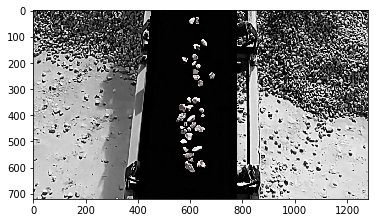

In [11]:
#for inference
t1 = time.time()

# instances=detect_and_extract(model, image_path=IMAGE_PATH, image_path2 = IMAGE_PATH2)
# instances=detect_and_extract(model, image_path=IMAGE_PATH)
os.chdir('C:/Users/sakshi11/Downloads/Mask_RCNN-master/Mask_RCNN-master/samples/balloon/')
for img in filenames:
    t2 = time.time()
    IMAGE_PATH2 = os.path.join(ROOT_DIR, "rocks\\"+img)
    IMAGE_PATH = os.path.join(ROOT_DIR, "masked\\masked_"+img)
    instances=detect_and_extract(model, image_path=IMAGE_PATH, image_path2=IMAGE_PATH2)
#     area_rock(instances)
    output = instances[0]
    os.chdir('C:/Users/sakshi11/Downloads/Mask_RCNN-master/Mask_RCNN-master/masked/')
    cv2.imwrite(img, output)
    os.chdir('C:/Users/sakshi11/Downloads/Mask_RCNN-master/Mask_RCNN-master/samples/balloon/')
    t2 = time.time() - t2
    print('Processed in {0:.2f} seconds'.format(t2))
t2 = time.time() - t1
print('Processed in {0:.2f} seconds'.format(t2))
plt.imshow(instances[0])

In [35]:
print(len(instances))
# areas= []
# areas.append(0.0)

4


In [ ]:
def area_rock(instances):
    final = np.zeros_like(instances[0])
    for index in range(1,len(instances)):
        blank = np.zeros_like(instances[0])
        gray = cv2.cvtColor(instances[index], cv2.COLOR_RGB2GRAY)
        ret,thresh = cv2.threshold(gray,255,255,255)
        im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(blank, contours, 0, (0,255,0), 3)
        cv2.drawContours(final, contours, 0, (0,255,0), 3)
        area = 0
        for i in contours:
            cont=i
            area += cv2.contourArea(cont)
    #     areas[index]=area
        areas.append(area)

In [ ]:
plt.plot(areas)

In [ ]:
areas.sort()